# Pandas Basics
## Data structures, indexing, and universal functions
#### Yufeng Huang
#### Associate Professor of Marketing, Simon Business School
#### August 6 and 8, 2024


## 0. Introduction --  Tabular data
- We often work with tabular data
    - "rectangular" datasets with a number of rows and a number of columns
    - rows are entries of data -- or we call them "observations"
    - columns are variables, each measuring a different aspect of that entry

- We learned that we can do something simple with that data with `NumPy`

- But for complex tasks, Pandas (or other data frame libraries) provide a more convenient interface

### Example
"student data" from Example 2 of the NumPy notes

In [269]:
students_dict = {
    "name": ["Alice Smith", "Bob Johnson", "Charlie Brown", "Diana Prince", "Ethan Hunt"],
    "entry_year": [2020, 2019, 2021, 2018, 2020],
    "test_score_at_entry": [82, 75, 83, 89, 87],
    "class_year": [2022, 2021, 2023, 2020, 2022],
    "class_score": [84, 80, 86, 90, 90]
}

We learned to use NumPy and base Python (lists and dictionaries) to work with these objects. 

But Pandas makes the syntax much easier to work on these data, particularly when it comes to more complicated operations. 

We can load Pandas and NumPy and view these data -- see that these are indeed tabular data.

In [270]:
import numpy as np
import pandas as pd
students_data = pd.DataFrame(students_dict)

students_data

,name,entry_year,test_score_at_entry,class_year,class_score
0,Alice Smith,2020,82,2022,84
1,Bob Johnson,2019,75,2021,80
2,Charlie Brown,2021,83,2023,86
3,Diana Prince,2018,89,2020,90
4,Ethan Hunt,2020,87,2022,90


### What is the advantage of Pandas?

(This looks like a 2D array?)

More seriously, what does "more complicated" operations mean?
- When we need to index beyond NumPy's capability -- we'll later differentiate between implicit index (0, 1, ...) and explicit index (whatever you define)
- When we need to perform operations that are not element-wise -- e.g., pivot tables etc.
- When we need to handle missing values 

`Pandas are built on NumPy` and provides a convenient toolbox for operating on data frames, both simple (e.g., vectorized addition and subtraction) and complicated operations

As we will see, Pandas is not the most efficient library out there when it comes to data frames, and can often fall short on the efficiency side. We will introduce "fancier" tools later

### Install Pandas
Same drill as before. In the Terminal/Anaconda prompt, activate the environment (e.g., `gba464`) and then type `pip install pandas`

In [271]:
# Then import Pandas (also NumPy)
import numpy as np
import pandas as pd

### This week
- Pandas
    1. Three data structures: Series, DataFrame, and Index
    2. The way indexing works in Pandas DataFrame
    3. Universal functions in Pandas
    4. Missing data
    5. Combining multiple data frames -- merge and concatenate
    6. Aggregation inside data frames
    7. Pivot tables

- You might find 1-3 somewhat familiar (but with important differences to NumPy), and 4-7 new
- We'll leave 5, 6, 7 to part 2 of this lecture notes
    


##### Side note 1
Although we're learning Pandas now, before Assignment 1 is due, please do not use Pandas at all in Assignment 1 other than for the code already written in the handout. 

##### Side note 2
Supplemental reading: 
- Pandas users guide https://pandas.pydata.org/docs/user_guide/index.html
- Pandas cookbook by Matt Harrison and Theodore Petrou

## 1. Three main data structures in Pandas
- There are three data structures we'll need to learn: Series, DataFrame, and Index

### 1.1. Series

A `Series` is a one-dimensional array-like object containing an array of data and an associated array of data labels, called its index

It "looks like" a column in a spreadsheet or a single-dimensional NumPy array, but it comes with additional functionalities

Key Characteristics:
- One-dimensional: data arranged in a single column
- Labeled: each element has an associated index
- Size immutable: size of a Series cannot be changed

![](series_anatomy.png)

Image Source - "Pandas Cookbook" by Matt Harrison and Theodore Petrou

#### Create a series

In [272]:
# Creating a Series
s = pd.Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

As we see in the preceding output, the Series wraps both a sequence of values `(10, 20, ...)` and a sequence of indices `(0, 1, ...)`, which we can access with the values and index attributes
- Values are just a 1D `np.ndarray`
- Indices are "similar to" an array or a set


In [273]:
# values of a series 
s.values

array([10, 20, 30, 40, 50])

In [274]:
# index of a series -- here it indicates that we haven't "explicitly" defined our own index, so it uses a range(start=0, stop=5)
s.index

RangeIndex(start=0, stop=5, step=1)

#### How does indexing work in a Series?

We can access elements of the Series using the index:

In [275]:
# First element
print(s[0])

10


In [276]:
# First to third
print(s[0:3])

0    10
1    20
2    30
dtype: int64


But, we have specifically have the index attribute for a reason. We can try creating a series with an index defined on our own.

In [277]:
# Create a pd.Series with our own indices
s2 = pd.Series([5.5, 7.1, 4.2, 8.5, 9.1], index = ["a", "b", "c", "d", "e"])
s2

a    5.5
b    7.1
c    4.2
d    8.5
e    9.1
dtype: float64

Now that we have our own indices `"a", "b", ...`, we can index by these letters. Note that:
1. We can index by one index, just as before
2. We can also index by a range of indices. But if we have our own index, `"a", "b", ..., `, then we `stop at the "stop", not before it`
3. We can mask by booleans, which we saw when working with NumPy
4. We can also "fancy index," something that does work with NumPy, but we didn't talk about it back then

In [278]:
# Index by one letter
s2["a"]

5.5

In [279]:
# Slice by a range in the indices, note that we include both "a" and "c"
s2["a":"c"]

a    5.5
b    7.1
c    4.2
dtype: float64

In [280]:
# We can Mask by booleans, something we've seen in NumPy
s2[s2 >= 7]

b    7.1
d    8.5
e    9.1
dtype: float64

In [281]:
# Index by "Fancy Index," i.e. using a list of index
s2[["a", "e", "d"]]

a    5.5
e    9.1
d    8.5
dtype: float64

#### Create series from dictionaries
We can create Series from dictionaries, in which case the keys automatically become indices

In [282]:
# Create Series from a dictionary
dict = {"a":1, 'b':2, 'c':3}
s3 = pd.Series(dict)
s3

a    1
b    2
c    3
dtype: int64

### 1.2. DataFrame
A `DataFrame` is a two-dimensional array-like object containing an ordered collection of columns, each of which can be of a different type
- each column is a `Series`
- each row labeled by `index`
- each column labeled by `column`

Visually They appear like table consisting of *Rows* and *Columns*




![](anatomy_dataframe.png)

`The labels in index and column names allow for pulling out data based on the index and column name. `

The index is also used for *alighment*: When multiple Series or DataFrames are combined, the indexes align first before any calculation occurs.

Other points in the figure:
- We refer to index as axis 0 and column as axis 1
- Pandas uses **NaN** to represent missing values

#### Anatomy of a DataFrame

Like with Series, we can also take apart a data frame
- values is a two dimensional NumPy array
- index and columns contain `row indices` and `column names` -- both are the "index" structure

In [283]:
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]})
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [284]:
# values are two-dimensional arrays
df.values

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [285]:
# rows labeled by indices
df.index

RangeIndex(start=0, stop=4, step=1)

In [286]:
# columns labeled by .columns
df.columns

Index(['A', 'B'], dtype='object')

#### Creating DataFrames

There are multiple ways to create a dataframe using the DataFrame() method
- from a dictionary (what we saw last week)
- from an NumPy Array (need to specify columns)
- from a list of list (similar to from a NumPy array)
- read from a file (more on this later)

In [287]:
# Creating DataFrame using Dictonary 
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}
df = pd.DataFrame(data)
print(f'DataFrame using Dict:\n{df}\n')

# Creating DataFrame using numpy arrays
data = np.array([
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'Los Angeles'],
    ['Charlie', 35, 'Chicago']
])
df = pd.DataFrame(data, columns=['Name', 'Age', 'City'])
print(f'DataFrame using Numpy array:\n{df}\n')

# Creating DataFrame using list of lists
data = [
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'Los Angeles'],
    ['Charlie', 35, 'Chicago']
]
df = pd.DataFrame(data, columns=['Name', 'Age', 'City'])
print(f'DataFrame using Lists of List:\n{df}\n')

DataFrame using Dict:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago

DataFrame using Numpy array:
      Name Age         City
0    Alice  25     New York
1      Bob  30  Los Angeles
2  Charlie  35      Chicago

DataFrame using Lists of List:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago



### 1.3. Index
The `pd.Index` object is its own kind
- In a sense, it can be viewed as an `immutable array`
- or an ordered, sliceable set

It has its own index (0, 1, ...) like an array, but it is immutable

It permits set operations, but is ordered and sliceable like an array

In [288]:
# Construct a pd.Index
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [289]:
# pd.Index is zero indexed
ind[0:2]

Index([2, 3], dtype='int64')

In [290]:
# pd.Index is immutable. Uncomment the following to try
# ind[-1] = 9

In [291]:
# pd.Index permits set operations, but need .intersection and .union etc to work
ind2 = pd.Index([1, 2, 3, 5, 7])
ind.intersection(ind2)

Index([2, 3, 5, 7], dtype='int64')

In [292]:
ind.union(ind2)

Index([1, 2, 3, 5, 7, 11], dtype='int64')

#### 1.4. Miscelaneous points

I will talk about important small functions/methods here and there. Now that we've seen a pd.Series and a pd.DataFrame, here are a few things to know.

`df.head()` gives the first few rows of a data frame.

In [293]:
# Recall this was our df
df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


In [294]:
# df.head(k) gives the first k rows. This is a small df, so there's not much point in using this. But we can still do:
df.head(2)

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles


`df.info()` gives some general info.

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   City    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


`df.describe()` gives summary statistics.

In [296]:
# Summary statistics. Here just one column because we only have a numeric column, age. Later we'll see this thing returning many columns' statistics.
df.describe()

,Age
count,3.0
mean,30.0
std,5.0
min,25.0
25%,27.5
50%,30.0
75%,32.5
max,35.0


## 2. Indexing and data selection in a Pandas DataFrame

It is worth quickly reviewing what we did with indexing the pd.Series

In a pd.DataFrame
1. We select by the explicit index -- index that we create and store in the `Index` object

2. What happens if we would like to select rows and columns?
    - the `loc` method allows one to use syntax similar to NumPy arrays (`.loc[row, column]`)
    - slicing, fancy indexing, and boolean masking work

3. Shorthand if we only select column or row by boolean masking?
    - `df["column_name"]` selects **columns** (where `"column_name"` refers to the actual column name)
    - `df[row_index]` selects **rows** where indices are numeric
    - `df[boolean_condition]` uses boolean masking to select **rows**, where `boolean_condition` refers to the logical operator that gives a boolean series

4. Other methods
    - the implicit index (`0, 1, ...`) still exist, and we need the `iloc` method to access it
    - `query` method uses a query string to select data


### 2.1. What can we do in a pd.Series?
Recall, with a pd.Series
- Elements are explicitly indexed with a pd.Index object
- Based on the pd.Index, can index, slice, select by fancy index and by masking

Let's take a look at what we can do using an example


In [297]:
# Monthly sales data for a small business
sales_data = {
    "January": 1500,
    "February": 1600,
    "March": 1700,
    "April": 1800,
    "May": 1900,
    "June": 2000,
    "July": 2100,
    "August": 2200,
    "September": 2300,
    "October": 2400,
    "November": 2500,
    "December": 2600
}

# Create a pandas Series
sales_series = pd.Series(sales_data, name="Monthly Sales")
sales_series

January      1500
February     1600
March        1700
April        1800
May          1900
June         2000
July         2100
August       2200
September    2300
October      2400
November     2500
December     2600
Name: Monthly Sales, dtype: int64

Let's try doing the following:
1. Indexing:
    - select January's sales
    - select July's sales
2. Slicing
    - select January to March's sales
    - select odd Month's sales
3. Fancy indexing
    - select January, June, and October's sales
4. Masking
    - select sales where sales is above 2000 and below 2500, find which month are they

In [298]:
# January's sales
sales_series["January"]

1500

In [299]:
# July's sales
sales_series["July"]
# please complete

2100

In [300]:
# January to March's sales  
sales_series["January":"March"]
#   note: include both ends, which is the case with explicit indices

January     1500
February    1600
March       1700
Name: Monthly Sales, dtype: int64

In [301]:
# January, June, and October's sales
sales_series[["January", "June", "October"]]
#   note the double brackets. Inside the outer bracket is a list of values

January    1500
June       2000
October    2400
Name: Monthly Sales, dtype: int64

In [302]:
# sales >= 2000 and <= 2500
sales_series[(sales_series >= 2000) & (sales_series <= 2500)]
#   note the parentheses, as with all &, |, ~ operators used on series or arrays

June         2000
July         2100
August       2200
September    2300
October      2400
November     2500
Name: Monthly Sales, dtype: int64

So, we see that pd.Series can work with indices in a fairly flexible way.

We know that pd.DataFrame's are two-dimensional objects with row and column indices. So all we need is a generalization of pd.Series' rule onto two dimensions.

### 2.2. Basic ideas of indexing a Pandas DataFrame -- `df.loc[row, column]`


In [303]:
# Let's create some data
data = {
    'region': ['Europe', 'North America', 'Asia', 'Africa', 'South America'],
    'nr_tourists': [30000000, 25000000, 45000000, 15000000, 22000000],
    'avg_temperature': [55, 65, 75, 85, 75]
}
df = pd.DataFrame(data)
df

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65
2,Asia,45000000,75
3,Africa,15000000,85
4,South America,22000000,75


As the most standard data frame indexing approach, we can select one column and one row using `df.loc[row_index, "column_name"]`

In [304]:
# the most standard is .loc[row, column]
df.loc[1, "region"]

'North America'

In [305]:
# how about row 2, avg_temperature?
df.loc[1, "avg_temperature"]
# please fill in

65

Now, all we know about slicing, fancy indexing, and boolean masking all work!
- For example
    - select first three rows, index 0:2 *(side comment, 0:2 are explicit indices in pd.Series and pd.DataFrame)*, and all columns
    - select all rows, columns region and nr_tourists
    - select all rows, columns region and avg_temperature
    - select rows such that nr_tourists is >= 25000000, and get avg_temperature
    - select rows such that region is Europe or North America, all columns
    

In [306]:
# Select first three rows
df.loc[0:2, :]
#   note: can skip :

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65
2,Asia,45000000,75


In [307]:
# Select columns region and nr_tourists (slicing)
df.loc[:, "region":"nr_tourists"]

,region,nr_tourists
0,Europe,30000000
1,North America,25000000
2,Asia,45000000
3,Africa,15000000
4,South America,22000000


In [308]:
# Select columns region and avg_temperature (fancy indexing)
df.loc[:, ["region", "avg_temperature"]]

,region,avg_temperature
0,Europe,55
1,North America,65
2,Asia,75
3,Africa,85
4,South America,75


In [309]:
# Select rows based on value falling in a range
df.loc[df["nr_tourists"] >= 25_000_000, "avg_temperature"]

0    55
1    65
2    75
Name: avg_temperature, dtype: int64

In [310]:
# Select rows based on value in discrete set
df.loc[df["region"].isin(["Europe", "North America"]), :]

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65


##### Comments
1. `25_000_000` is the same as `25000000`, but the latter is harder to read.
2. Could use `df.loc[:, "region"]` instead of `df["region"]`, but that's more cumbersome. More on `df["region"]` later.
3. The `.isin()` method for pd.Seires checks if each element is in a set. The set operator `in` does not work because it would have checked if the entire `df["region"]` is in the set. 


### 2.3. Shorthand `df[]` syntax
Oftentimes, short indexing lines we can use `df[]` instead of `df.loc[]`, but the use of `df[]` follows specific, ad-hoc rules
1. `df["column_name"]` gets one column
2. `df[index0:index1]` gets row slicing. `df[bool]` gets row masking by boolean

In [311]:
# df[] to get a column
df["region"]

0           Europe
1    North America
2             Asia
3           Africa
4    South America
Name: region, dtype: object

In [312]:
df

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65
2,Asia,45000000,75
3,Africa,15000000,85
4,South America,22000000,75


In [313]:
# slicing does not work
# df["region":"nr_tourists"]

`In Pandas, you can only slice rows using labels or positions, not columns`

In [314]:
# Fancy indexing still works
df[["region", "nr_tourists"]]

,region,nr_tourists
0,Europe,30000000
1,North America,25000000
2,Asia,45000000
3,Africa,15000000
4,South America,22000000


In [315]:
# Slicing is always for rows (also work with explicitly indexed df's)
df[0:3]

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65
2,Asia,45000000,75


##### Comments:
- **`df[]` slicing is always for rows**, but note that now we switched to implcit index, which stops before, not at "stop"
- I don't encourage you use row slicing with index. Heavily rely on sorting order. Very easy to make mistakes.
- Select rows with boolean masking makes much more sense.

In [316]:
# Booleans for rows, makes more sense
df[df["region"].isin(["Europe", "North America"])]

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65


### 2.4. Other notes

1. `df.iloc[]` exists as a way to access implicit indices. They exist. But we don't use this a lot.

In [317]:
# .iloc gets access to implicit indices. They work with the NumPy syntax as we know it.
df.iloc[0:3, 0:2]   

,region,nr_tourists
0,Europe,30000000
1,North America,25000000
2,Asia,45000000


2. `.query` method allows us to use string queries for **rows**
- Can refer to column names directly, sometimes simplifying the syntax
- I personally don't like this because we lose syntax highlight within a string, leading to easy mistakes

In [318]:
df.query('region == "Europe" or region == "North America"')

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65


In [319]:
df.query("avg_temperature >= 75")

,region,nr_tourists,avg_temperature
2,Asia,45000000,75
3,Africa,15000000,85
4,South America,22000000,75


3. One can also sort a data frame

I personally think if we have the way to query rows, we *often* don't need to worry so much about sort. But we could sort using `.sort_values()` and `.sort_index()`

Technically we can index by `np.argsort()` results to sort, but that's not the simplest syntax

Case when sort is useful: compute changes! One example on that later.

In [320]:
df.sort_values("region")    # note: it does not alter df, it just returns the sorted df as a new df (you can set inplace=True to replace df)

,region,nr_tourists,avg_temperature
3,Africa,15000000,85
2,Asia,45000000,75
0,Europe,30000000,55
1,North America,25000000,65
4,South America,22000000,75


In [321]:
df

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65
2,Asia,45000000,75
3,Africa,15000000,85
4,South America,22000000,75


In [322]:
df.sort_index()         # sort_index() no argument because we're just sorting by the one index

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65
2,Asia,45000000,75
3,Africa,15000000,85
4,South America,22000000,75


In [323]:
i_sort_region = df["region"].argsort()
df.iloc[i_sort_region, :]       # note iloc

,region,nr_tourists,avg_temperature
3,Africa,15000000,85
2,Asia,45000000,75
0,Europe,30000000,55
1,North America,25000000,65
4,South America,22000000,75


Comments: in the above, we use .iloc because we're actually accessing the implcit indices, given this is a NumPy action. But not recommended in the pandas world.

## 3. Data Frame Operations with Universal Functions
- Pandas' columns support the use of ufuncs because these columns are pd.Series, which themselves are built on NumPy arrays
- Therefore, column-with-column operations are the most canonical way of vectorized operations in a DataFrame
- But because rows are indexed, ufunc operations with columns will **preserve index** (i.e., they keep the indices) and **align indices** (i.e., they align indices between the two objects)
- We also have other, niche operations that leverage the tabular properties of DataFrames, similar to NumPy arrays


##### Example 1: constructing some columns within a data frame

In [324]:
# Recall df
df

,region,nr_tourists,avg_temperature
0,Europe,30000000,55
1,North America,25000000,65
2,Asia,45000000,75
3,Africa,15000000,85
4,South America,22000000,75


We'll try converting the number of tourists into millions, dividing it by `1e6` (or `1_000_000`)

In [325]:
df["nr_tourists_in_m"] = df["nr_tourists"] / 1e6

# show results
df

,region,nr_tourists,avg_temperature,nr_tourists_in_m
0,Europe,30000000,55,30.0
1,North America,25000000,65,25.0
2,Asia,45000000,75,45.0
3,Africa,15000000,85,15.0
4,South America,22000000,75,22.0


We can also convert temperature in F to C, using the formula: `temp_C = (temp_F - 32) * 5 / 9`

In [326]:
df["avg_temp_C"] = ((df["avg_temperature"] - 32) * 5 / 9).round()      # round to integer
df

,region,nr_tourists,avg_temperature,nr_tourists_in_m,avg_temp_C
0,Europe,30000000,55,30.0,13.0
1,North America,25000000,65,25.0,18.0
2,Asia,45000000,75,45.0,24.0
3,Africa,15000000,85,15.0,29.0
4,South America,22000000,75,22.0,24.0


##### Example 2: operation between a pd.Series and a pd.DataFrame + index preservation and alignment
Let's switch gear to a different data frame, for which rows are indexed. This example actually later crosses over to the topic of "working with multiple data frames." Let's first construct this data frame with indices.

Below, we have four products, P001-P004. The product code is an index. The columns are each product's sales volume in each quarter.

In [327]:
# Indexed data frame 1
sales_data = {
    "sales_q1": [150, 200, 350, 120],
    "sales_q2": [160, 210, 370, 130],
    "sales_q3": [170, 220, 380, 140],
    "sales_q4": [180, 230, 390, 90]
}
sales_data = pd.DataFrame(sales_data, index=["P001", "P002", "P003", "P004"])


In [328]:
sales_data

,sales_q1,sales_q2,sales_q3,sales_q4
P001,150,160,170,180
P002,200,210,220,230
P003,350,370,380,390
P004,120,130,140,90


Suppose the year's prices are fixed for each product. And we can define prices in a Series (because they are fixed in a column)

In [329]:
price_series = pd.Series([1000, 2000, 1000, 3000], 
                         index=["P001", "P002", "P003", "P004"])
price_series

P001    1000
P002    2000
P003    1000
P004    3000
dtype: int64

Now, how to we compute revenue for each model for each quarter? 
- We can loop over each quarter. There are some nice formatting string tricks that one can use. This would be the standard approach.
- Or, if we really know what we're doing --in this case, we know the entire data consists of sales columns-- we can compute revenue into another data frame using NumPy array broadcasting
- Treat the first approach as standard and the second as niche.

Approach 1: loop over columns (**standard**)

In [330]:
# Example: how about the first quarter
qtr = 1
sales_data[f"sales_q{qtr}"] * price_series


P001    150000
P002    400000
P003    350000
P004    360000
dtype: int64

In [331]:
# Complete the loop
rev_data = pd.DataFrame()       # empty data frame as a placeholder
for qtr in range(1, 5):
    rev_data[f"rev_q{qtr}"] = sales_data[f"sales_q{qtr}"] * price_series


In [332]:
rev_data

,rev_q1,rev_q2,rev_q3,rev_q4
P001,150000,160000,170000,180000
P002,400000,420000,440000,460000
P003,350000,370000,380000,390000
P004,360000,390000,420000,270000


Approach 2: 
- We know that (1) `sales_data` rows are indexed by the model number, the same indices as in `price_series` and (2) the entire sales_data are what we want to multiply prices with
- In this case, we can just multiply price_series as a column on the entire sales data. Have to specify `axis=0` to say we're treating `price_series` as in different rows
- Treat this as a niche case. It would be useful if you really want to avoid loops. But in most cases not necessary and prone to mistakes.

In [333]:
sales_data.multiply(price_series, axis=0)

,sales_q1,sales_q2,sales_q3,sales_q4
P001,150000,160000,170000,180000
P002,400000,420000,440000,460000
P003,350000,370000,380000,390000
P004,360000,390000,420000,270000


##### Index alignment and preservation
One might wonder: what happens if we now have a different price series. One that's unsorted and contains an extra product that, probably because priced too high, stopped selling. How do we now multiply prices with sales?

Let's examine this case by constructing a `price_series_2` that has the same indices but is not ordered

In [334]:
price_series_2 = pd.Series([2000, 3000, 1000, 5000, 1000], 
                           index=["P002", "P004", "P001", "P005", "P003"])
price_series_2

P002    2000
P004    3000
P001    1000
P005    5000
P003    1000
dtype: int64

In [335]:
# In fact, if we just run the previous loop, we'll have
rev_data_2 = pd.DataFrame()       
for qtr in range(1, 5):
    rev_data_2[f"rev_q{qtr}"] = sales_data[f"sales_q{qtr}"] * price_series_2

In [336]:
rev_data_2  # !!!

,rev_q1,rev_q2,rev_q3,rev_q4
P001,150000.0,160000.0,170000.0,180000.0
P002,400000.0,420000.0,440000.0,460000.0
P003,350000.0,370000.0,380000.0,390000.0
P004,360000.0,390000.0,420000.0,270000.0
P005,NaN,NaN,NaN,NaN


So, we can just do the operation, because although `price_series_2` is not sorted correctly, it is indexed appropriately so that we can follow the indices to match each element in `sales_data` and `price_series_2`.

We generally refer to this as index preservation and alignment -- universal function will match elements by indices (alignment), and the results preserve the indices (preservation).

There's a broader point about this related to data frame merging. More on this later. 

##### Remark

As a side remark, without these indices, the implicit index in the data frame would not allow us to perform this operation. We generally require data frame column operations to be within the same data frame. In this sense, the above example is not a universal case where we can freely operate between a data frame and an outside pd.Series. We could do this only because the two objects have already well-defined indices.

## 4. Handling missing values
We've seen "NaN" in the previous example. `NaN` refers to "not a number" and represents missing values in NumPy and Pandas. But NaN is not a built-in Python representation of missing values. Technically, **`NaN` is a float**. 

We explicitly say something is missing using the value `np.nan`, which is NumPy's representation of missing values. Base Python also has a missing value, `None`. Pandas accepts this as well.

The main topics we should talk about with `NaN` are:
- `NaN` represents missing, so anything that touches upon `NaN` returns missing (mostly)
- we can detect `NaN` with `.isna()` or `.isnull()`
- we can drop, fill, and interpolate over `NaN`
- more importantly, we'll often have to deal with missings on our own, so indexing with `isna()` is often more important than `dropna()` or `fillna()`

Let's consider two examples to understand these points better.

In [337]:
# Bring this dataset back
rev_data_2

,rev_q1,rev_q2,rev_q3,rev_q4
P001,150000.0,160000.0,170000.0,180000.0
P002,400000.0,420000.0,440000.0,460000.0
P003,350000.0,370000.0,380000.0,390000.0
P004,360000.0,390000.0,420000.0,270000.0
P005,NaN,NaN,NaN,NaN


In [338]:
# Also bring back the price series
price_series_2

P002    2000
P004    3000
P001    1000
P005    5000
P003    1000
dtype: int64

#### 4.1. `NaN` represents missing, so almost anything that operates with an `NaN` gives missing 
- e.g., take log of the first quarter, find that log of `NaN` is still missing
- e.g., divide by prices (note: because of the indices, we can still not care about the ordering)

In [339]:
# E.g., take log of the first quarter
np.log(rev_data_2["rev_q1"])  

P001    11.918391
P002    12.899220
P003    12.765688
P004    12.793859
P005          NaN
Name: rev_q1, dtype: float64

In [340]:
# E.g., NaN divided by price
rev_data_2["rev_q1"] / price_series_2

P001    150.0
P002    200.0
P003    350.0
P004    120.0
P005      NaN
dtype: float64

In [341]:
# E.g., np.nan == np.nan cannot check NaN, because it would always be False
rev_data_2["rev_q1"] == np.nan

P001    False
P002    False
P003    False
P004    False
P005    False
Name: rev_q1, dtype: bool

#### 4.2. We can use `.isna()` or, interchangeably, `.isnull()` to check for missing values

In [342]:
rev_data_2["rev_q1"].isna()
rev_data_2["rev_q1"].isnull()
# equivalent is rev_data_2["rev_q1"].isnull()

P001    False
P002    False
P003    False
P004    False
P005     True
Name: rev_q1, dtype: bool

In [343]:
# We can also use `.notna()` to indicate non-missing
rev_data_2["rev_q1"].notna()


P001     True
P002     True
P003     True
P004     True
P005    False
Name: rev_q1, dtype: bool

#### 4.3. We can drop, fill, and interpolate `NaN`
- drop all rows with `NaN` with `.dropna()`
- fill missings with a specific value using `.fillna(value)`
- forward or backward fill using `.ffill()` or `.bfill()`, and interpolate with `.interpolate()`

Which one to use? This is really a case-by-case question.

Example: drop missings
- In the above example, we know that the model "P005" has the entire row missing. So we would like to drop that observation / row. 

In [344]:
# Use dropna() to remove all observations with any NaN. This method does not replace the original data.
rev_data_mod = rev_data_2.dropna()
rev_data_mod

,rev_q1,rev_q2,rev_q3,rev_q4
P001,150000.0,160000.0,170000.0,180000.0
P002,400000.0,420000.0,440000.0,460000.0
P003,350000.0,370000.0,380000.0,390000.0
P004,360000.0,390000.0,420000.0,270000.0


Example: fill missings
- But we could also interpret the missing as coming from that model "P005" no longer sells any unit. In that sense, revenue should be zero. 

In [345]:
# Fill missings with zero. Also do not replace the original data
rev_data_filled = rev_data_2.fillna(0)
rev_data_filled

,rev_q1,rev_q2,rev_q3,rev_q4
P001,150000.0,160000.0,170000.0,180000.0
P002,400000.0,420000.0,440000.0,460000.0
P003,350000.0,370000.0,380000.0,390000.0
P004,360000.0,390000.0,420000.0,270000.0
P005,0.0,0.0,0.0,0.0


Which way is correct? Hard to say. Handling missing values is really a big topic. Very context specific.

With this discussion, let's switch examples.

#### 4.4. Handling missing values is a very context-specific question. 
- It is **very dangerous** to apply `dropna()` and `fillna()` to the entire data frame. Instead, we have to be very careful what we assume about missing values
- I'll show it with one more conceptual example
- We will see this point in our first exercise 

In [346]:
# Conceptual example with multiple missing values with different reasons of missing
data = pd.DataFrame({
    "market": ["A", np.nan, np.nan, np.nan, "B", np.nan, np.nan, np.nan],
    "week": [1, 2, 3, 4, 1, 2, 3, 4],
    "sales": [1, 5, np.nan, 2, np.nan, 3, 1, 1],
    "price": [10, 5, 15, 10, 15, 10, 10, 10]
})

In [347]:
data

,market,week,sales,price
0,A,1,1.0,10
1,NaN,2,5.0,5
2,NaN,3,NaN,15
3,NaN,4,2.0,10
4,B,1,NaN,15
5,NaN,2,3.0,10
6,NaN,3,1.0,10
7,NaN,4,1.0,10


In this case, can we use `data.dropna()`? 

Sure you can... but what is the meaning of this?

In [348]:
data.dropna()   # clearly this makes no sense!

,market,week,sales,price
0,A,1,1.0,10


In this example, the market "A" and "B" clearly did not fill in other rows which also belong to the same market. This is not a good way of data recording, but it does happen.
- What to do? Need to fill values. But what values? Fill with the previous value -- that is, "forward fill"
- `.ffill()` is a method that fills using the previous value (it rolls the previous value forward, thus `.ffill`)


In [349]:
data["market"].ffill()  

0    A
1    A
2    A
3    A
4    B
5    B
6    B
7    B
Name: market, dtype: object

Then replace the market column 

In [350]:
# forward fill market
data["market"] = data["market"].ffill()
data

,market,week,sales,price
0,A,1,1.0,10
1,A,2,5.0,5
2,A,3,NaN,15
3,A,4,2.0,10
4,B,1,NaN,15
5,B,2,3.0,10
6,B,3,1.0,10
7,B,4,1.0,10


Next, what do we do with sales? It is missing in two places. The question is: are they truly missing? Or is it that there's just no sales? 
- We ask the data provider (or your colleague who works on maintaining the database)
- The colleague comes back with "well, actually those are weeks when the price is really high, and we didn't sell any units" -- then we'll fill zero (most likely case here)

In [351]:
# fill missing sales with zero
data["sales"] = data["sales"].fillna(0)
data

,market,week,sales,price
0,A,1,1.0,10
1,A,2,5.0,5
2,A,3,0.0,15
3,A,4,2.0,10
4,B,1,0.0,15
5,B,2,3.0,10
6,B,3,1.0,10
7,B,4,1.0,10


Let's switch gear into another example, where we try to interpolate missing values more seriously.

We have a time series of Google's stock prices in January-February of 2023

I didn't explain reading data from csv, but the code is evident. I also didn't explain `.head()`, which prints the first few rows from a data frame. I also haven't talked about date/time, which will come later.

In [352]:
goog = pd.read_csv("./data/google_stock_prices.csv")
goog.head(16)

,Date,Open
0,8/8/2023,130.98
1,8/9/2023,132.19
2,8/10/2023,131.97
3,8/11/2023,129.20
4,8/12/2023,NaN
5,8/13/2023,NaN
6,8/14/2023,129.85
7,8/15/2023,131.59
8,8/16/2023,129.28
9,8/17/2023,130.45


In this data, we have missing values. Upon further inspection, we realize that Jan 1 is not a trading day, neither are Jan 7 and 8, and neither are Jan 14 and 15. 

So does it make sense to fill missing to zero? 
- For sure no! Because missings appear when there is no trading. 

But should we still try to fill missing? And how do we fill missing?
- I'll illustrate two cases.

1. Case 1 - when we need to approximate an "off hour" value of the stock. (E.g., some derivatives are trading in real time.)

In this case we interpolate.

The default of `.interpolate()` defaults to linearly interpolate, which is to draw a line between the immediate nonmissing values.

But you have the choice to do polynomial interpolation (fitting a polynomial), spline interpolation, and so on.


In [354]:
goog["price_interpolated"] = goog["price"].interpolate()     # can add method="polynomial", order=2 to specify we're using polynomial of order 2 to interpolate
goog.head(12)

KeyError: 'price'

2. Case 2 - when we need the previous market-close value to calculate stock return
- Hint: the `.pct_change()` method calculate percentage change from the previous value. The `.shift(1)` method gives the previous value.
- Our plan:
    1. make sure the data is correctly sorted
    2. record where the missing is
    3. interpolate with ffill to move the previous Friday's stock price to Monday
    4. compute the percent change
    5. set the percentage change back to missing after our calculation is done.


In [ ]:
# Let's do this together!


#### 4.5. Technical points about `np.nan` and `None`
- `None` represents missing in base Python, displays a little bit of different properties 
- Pandas can treat `None` and `np.nan` almost interchangeably


In [ ]:
# a base Python list with missing
[1, None, 2, None, 3]
[1, np.nan, 2, np.nan, 3]

In [ ]:
# a base Python list that contains NumPy's NaN
[1, np.nan, 2, np.nan, 3]

In [ ]:
# convert them into NumPy Array
a = np.array([1, None, 2, None, 3])
a

In [ ]:
# in NumPy, .isnan() can check NaN but not None
# np.isnan(a)

In [ ]:
b = np.array([1, np.nan, 2, np.nan, 3])
np.isnan(b)

In [ ]:
# we can check whether something is equal to None, but not np.nan
print(a == None)
print(b == np.nan)

In [ ]:
# convert into Pandas, no difference anymore
s = pd.Series([1, None, 2, np.nan, 3])
s

In [ ]:
s.isna()

## 5. Important Miscelaneous Topics

Here we cover a few very important miscelaneous topics. 
1. Reading and writing data from/to files
2. What are dates?
3. Basic use of Matplotlib

### 5.1 IO (input/output) Operations

Of course, in most circumstances we do not hand-type our data. We read data from files. And we write data and output to files. Here we talk about reading from and writing into files of tabular data. This is a pretty big topic. 

One thing we don't talk about is reading data from JSON, which is a typical way to store data in the format of a dictionary. That you'll probably see in future classes.

#### Reading and Writing a CSV File

- We're familiar with `pd.read_csv()`. It reads a "comma separated variable" (CSV) file

In [355]:
# # Reading a csv file 
df = pd.read_csv("./data/google_stock_prices.csv") 
df.head()

,Date,Open
0,8/8/2023,130.98
1,8/9/2023,132.19
2,8/10/2023,131.97
3,8/11/2023,129.20
4,8/12/2023,NaN


- The file itself is a text data where columns are separated by commas
- To see the text itself is a string, we can use **built-in** Python function `open()` to open the file, mode `r` for read. And we'll see that indeed the date and price are separated by commas. Note that we do not typically read csv data in the text form.

In [356]:
# note: for understanding purposes only
f = open("./data/google_stock_prices.csv", mode="r")
print(f.read())

Date,Open
8/8/2023,130.98
8/9/2023,132.19
8/10/2023,131.97
8/11/2023,129.2
8/12/2023,
8/13/2023,
8/14/2023,129.85
8/15/2023,131.59
8/16/2023,129.28
8/17/2023,130.45
8/18/2023,129.06
8/19/2023,
8/20/2023,
8/21/2023,127.85
8/22/2023,129.13
8/23/2023,130.85
8/24/2023,134.73
8/25/2023,130.14
8/26/2023,
8/27/2023,
8/28/2023,132.08
8/29/2023,133
8/30/2023,135.57
8/31/2023,137.05
9/1/2023,138.43
9/2/2023,
9/3/2023,
9/4/2023,
9/5/2023,136.44
9/6/2023,137.01
9/7/2023,134.6
9/8/2023,135.87
9/9/2023,
9/10/2023,
9/11/2023,137.38
9/12/2023,137.13
9/13/2023,135.9
9/14/2023,138.39
9/15/2023,138.8
9/16/2023,
9/17/2023,
9/18/2023,137.63
9/19/2023,138.25
9/20/2023,138.83
9/21/2023,132.39
9/22/2023,131.68
9/23/2023,
9/24/2023,
9/25/2023,130.77
9/26/2023,130.91
9/27/2023,129.44
9/28/2023,130.69
9/29/2023,134.08
9/30/2023,
10/1/2023,
10/2/2023,132.15
10/3/2023,134.93
10/4/2023,133.66
10/5/2023,136.13
10/6/2023,134.94
10/7/2023,
10/8/2023,
10/9/2023,137.99
10/10/2023,139.51
10/11/2023,139.85
10/12/2023,142.

- Supposed we would like to clear out missings and save these data in a separate file. We could make our edits, and use `pd.to_csv()` to save it.

In [357]:
# Edit data df: clear missing rows
df_nona = df[df["Open"].notna()]  
df_nona.head()   # side note: index followed df

,Date,Open
0,8/8/2023,130.98
1,8/9/2023,132.19
2,8/10/2023,131.97
3,8/11/2023,129.20
6,8/14/2023,129.85


In [358]:
# Then, save file to csv by to_csv. Here, we don't need to keep the index, so we say index=False
df_nona.to_csv("./output/google_stock_prices_nona.csv", index=False) 

#### Reading other Tabular Data: Tab-delimited Files and Excel Files
Some files are not comma separated. Common ones are tab separated and excel files. First let's look at a tab separated variable file. The file extensions can either be `.txt` (as a general text file) or `.tsv` (as a tab separated variable file).

In [359]:
# Read a tab-separated variable file
employee_data = pd.read_table("./data/employee_data.txt")
employee_data.head()

,Employee,ID,Department,Salary
0,John Smith,201,Engineering,75000
1,Jane Doe,202,Marketing,65000
2,Emily Johnson,203,Finance,72000
3,Michael Brown,204,Human Resources,68000
4,Sarah Davis,205,Engineering,77000


For understand purposes, we can read the data as a text file and see that it is indeed tab-separated.

In [360]:
f = open("./data/employee_data.txt", mode="r")
print(f.read())

Employee	ID	Department	Salary
John Smith	201	Engineering	75000
Jane Doe	202	Marketing	65000
Emily Johnson	203	Finance	72000
Michael Brown	204	Human Resources	68000
Sarah Davis	205	Engineering	77000
David Wilson	206	Marketing	63000
Linda Martinez	207	Finance	71000
James Anderson	208	Human Resources	69000
Patricia Thomas	209	Engineering	76000
Robert Jackson	210	Marketing	64000
Maria White	211	Finance	73000
William Harris	212	Human Resources	67000
Barbara Clark	213	Engineering	78000
Richard Lewis	214	Marketing	62000
Susan Walker	215	Finance	74000
Joseph Hall	216	Human Resources	66000
Jessica Young	217	Engineering	75000
Thomas King	218	Marketing	65000
Karen Wright	219	Finance	72000
Charles Scott	220	Human Resources	68000



View the data's info and look into the data. Realize that each observation is an employee (there are 20 of them), and the data records salary and department

In [361]:
# View the data's info
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Employee    20 non-null     object
 1   ID          20 non-null     int64 
 2   Department  20 non-null     object
 3   Salary      20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes


Now we add an additional Data Frame to characterize each department's information. Each department has five employees, and their average salary can be computed using `.groupby().agg()`. But we'll get there next class. For now, take the summary stats as given. 

In [362]:
# Construct department's summary data
department_data = pd.DataFrame([
    ["Engineering", 5, 76200],
    ["Marketing", 5, 63800],
    ["Finance", 5, 72400],
    ["Human Resources", 5, 67600]
], columns=["Department", "Total Employees", "Average Salary"])
department_data

,Department,Total Employees,Average Salary
0,Engineering,5,76200
1,Marketing,5,63800
2,Finance,5,72400
3,Human Resources,5,67600


Now, we'll write both `employee_data` and `department_data` into an Excel file. For this step, we'll need a library `openpyxl`. Use `pip install openpyxl` to install this. Then, the process of writing into an Excel sheet will involve:
1. define an Excel writer as a combination of Excel file and *engine*
2. write each sheet to that Excel writer, specifying sheet name

In [364]:
# Recall we already have employee_data and department_data. 

# We'll create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter("./data/employee_data_with_summary.xlsx", engine="openpyxl") as writer:
    employee_data.to_excel(writer, sheet_name='employee', index=False)
    department_data.to_excel(writer, sheet_name='department', index=False)


We can open the Excel file to see we've indeed written things in it

In [365]:
# Open the excel file, sheet "department", also use the engine openpyxl
test_df = pd.read_excel("./data/employee_data_with_summary.xlsx", engine="openpyxl", sheet_name="department")
test_df

,Department,Total Employees,Average Salary
0,Engineering,5,76200
1,Marketing,5,63800
2,Finance,5,72400
3,Human Resources,5,67600


#### Reading a fixed-width file
Fixed-width files are intuitive to read by a human. Consider the following text file:

In [366]:
f = open('./data/fixed_width_data.txt', mode="r")
print(f.read())

Name      Age  City           
Alice     25   New York       
Bob       30   Los Angeles    
Charlie   35   Chicago        



This file is pleasing to the eye for a human. But note that to create the "fixed width" of each column we actually use variable number of spaces. So these files are hard to read by the computer. 

To read them, we'll have to specify the width of the start of each column as the count of how many characters from the previous column. In this case, The first column takes the first 10 characters. The second column the next 5. Then the third column the next 12.

So bottom line is: *avoid* fixed width data as much as possible, but we need to know how to read them.

In [367]:
# column width as the number of characters each column takes
column_widths = [10, 5, 12]     
age_and_city = pd.read_fwf('./data/fixed_width_data.txt', widths=column_widths)
age_and_city

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


### 5.2 What are dates?
Dates, e.g. `"1/1/2023"`, are strings. But it is useful to give dates specific meanings that allow one to operate on them more easily. To do so, we can use Pandas to make these strings into specific data types called "date." It's a simple topic with specific syntaxes. Let's talk about them here. We can also use the library `datetime`. But we'll prioritize Pandas.

First, let's load the Google stock price data, the version we cleaned out the NaN's.

In [368]:
df = pd.read_csv("./output/google_stock_prices_nona.csv") 
df.head()

,Date,Open
0,8/8/2023,130.98
1,8/9/2023,132.19
2,8/10/2023,131.97
3,8/11/2023,129.20
4,8/14/2023,129.85


The date variable are strings. Well, strictly speaking, they are included as the general-purpose data type "object." We can show this in:

In [369]:
df["Date"].dtype

dtype('O')

Or:

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    59 non-null     object 
 1   Open    59 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


Or if we sort the data by date, the sorting order would be wrong. What order is this?

In [371]:
# find that we sort 
df.sort_values("Date").head(12)

,Date,Open
44,10/10/2023,139.51
45,10/11/2023,139.85
46,10/12/2023,142.16
47,10/13/2023,140.65
48,10/16/2023,139.73
49,10/17/2023,140.03
50,10/18/2023,140.75
51,10/19/2023,139.80
38,10/2/2023,132.15
52,10/20/2023,138.59


Let's now convert these strings (or, "objects") to dates. We'll use the Pandas method `.to_datetime()`. Parameter `format` specifies the format 
- `%m` for month, `%d` for day, and `%Y` for four-digit years
- `/` is part of the day or time string
- the format `"%m/%d/%Y"` mimicks the original date format

In [372]:
# Convert the string column into a date column, see the format change.
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.head()

,Date,Open
0,2023-08-08,130.98
1,2023-08-09,132.19
2,2023-08-10,131.97
3,2023-08-11,129.20
4,2023-08-14,129.85


Now, date is now a timestamp object and is of numeric value. To see this, we can try a few things.
1. We can sort by date, and that gives us the right order
2. We can take differences between dates
3. We can convert dates to integers
4. We can extract components out of this object

1. We can sort by a true date (or timestamp) and get intuitive sorting order

In [373]:
# 1. sort by date - what are we sorting by?
df.sort_values("Date").head(12)

,Date,Open
0,2023-08-08,130.98
1,2023-08-09,132.19
2,2023-08-10,131.97
3,2023-08-11,129.20
4,2023-08-14,129.85
5,2023-08-15,131.59
6,2023-08-16,129.28
7,2023-08-17,130.45
8,2023-08-18,129.06
9,2023-08-21,127.85


2. We can take differences and get days

In [374]:
# 2. take differences between dates
df["Delta_Date"] = df["Date"] - df["Date"].shift(1)
df.head(8)

,Date,Open,Delta_Date
0,2023-08-08,130.98,NaT
1,2023-08-09,132.19,1 days
2,2023-08-10,131.97,1 days
3,2023-08-11,129.20,1 days
4,2023-08-14,129.85,3 days
5,2023-08-15,131.59,1 days
6,2023-08-16,129.28,1 days
7,2023-08-17,130.45,1 days


3. Timestamps are stored as unix time

In [375]:
# 3. convert date to int64
df["Date"].astype("int64").head(8)

0    1691452800000000000
1    1691539200000000000
2    1691625600000000000
3    1691712000000000000
4    1691971200000000000
5    1692057600000000000
6    1692144000000000000
7    1692230400000000000
Name: Date, dtype: int64

What is this thing above?

Note that 1691539200000000000 - 1691452800000000000 = 86400000000000. 86_400_000_000_000 / 3_600 / 24 = 1_000_000_000. 

Python dates are stored as nanoseconds since the Unix epoch, which is January 1, 1970 at 00:00:00 UTC. 

4. We can extract dates, day, month, year, etc. from timestamps

First, do this on a single value

In [376]:
# 4. can extract objects from timestamp
#   a. convert to date (has to do this on each object, not the series)
df["Date"][0].date()

datetime.date(2023, 8, 8)

Then use `.dt.date` to do this on a series

In [377]:
#   b. extract date, month and year
df["Date"].dt.date.head()

0    2023-08-08
1    2023-08-09
2    2023-08-10
3    2023-08-11
4    2023-08-14
Name: Date, dtype: object

In [378]:
df["Date"].dt.day.head()

0     8
1     9
2    10
3    11
4    14
Name: Date, dtype: int32

In [379]:
df["Date"].dt.year.head()

0    2023
1    2023
2    2023
3    2023
4    2023
Name: Date, dtype: int32

How about other string formats?

Similar syntax for other date and time formats. See below for a table of syntax:

- `%Y`: Year with century (e.g., 2023)
- `%y`: Year without century (e.g., 23)
- `%m`: Month as a zero-padded decimal number (e.g., 01, 02, ..., 12)
- `%d`: Day of the month as a zero-padded decimal number (e.g., 01, 02, ..., 31)
- `%H`: Hour (24-hour clock) as a zero-padded decimal number (e.g., 00, 01, ..., 23)
- `%I`: Hour (12-hour clock) as a zero-padded decimal number (e.g., 01, 02, ..., 12)
- `%p`: AM or PM
- `%M`: Minute as a zero-padded decimal number (e.g., 00, 01, ..., 59)
- `%S`: Second as a zero-padded decimal number (e.g., 00, 01, ..., 59)
- `%f`: Microsecond as a decimal number (e.g., 000000, 000001, ..., 999999)
- `%z`: UTC offset in the form +HHMM or -HHMM (e.g., +0000, -0400, +1030)
- `%Z`: Time zone name (e.g., UTC, EST, CST)
- `%j`: Day of the year as a zero-padded decimal number (e.g., 001, 002, ..., 366)
- `%U`: Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number (e.g., 00, 01, ..., 53)
- `%W`: Week number of the year (Monday as the first day of the week) as a zero-padded decimal number (e.g., 00, 01, ..., 53)
- `%a`: Abbreviated weekday name (e.g., Sun, Mon, Tue)
- `%A`: Full weekday name (e.g., Sunday, Monday, Tuesday)
- `%b`: Abbreviated month name (e.g., Jan, Feb, Mar)
- `%B`: Full month name (e.g., January, February, March)

In [380]:
# Additional examples
examples = ["2023-05-28", "191212", "Jan 5, 2022", "08/07/2024 3:45 PM"]
formats = ["%Y-%m-%d", "%y%m%d", "%b %d, %Y", "%m/%d/%Y %I:%M %p"]

In [381]:
# Run through these examples
#   btw, different format, need to loop
date_time = pd.Series([pd.to_datetime(examples[i], format=formats[i]) for i in range(len(examples))])
date_time

0   2023-05-28 00:00:00
1   2019-12-12 00:00:00
2   2022-01-05 00:00:00
3   2024-08-07 15:45:00
dtype: datetime64[ns]

In [382]:
# add .date() to make dates
[date_time[i].date() for i in range(len(date_time))]

[datetime.date(2023, 5, 28),
 datetime.date(2019, 12, 12),
 datetime.date(2022, 1, 5),
 datetime.date(2024, 8, 7)]

#### 5.3 Basic Matplotlib usage
I will go through a few miscelaneous points in this note. I was going to talk about Matplotlib later. But now that we're starting to work with realistic data, we should know how to visualize them. I'll later do a longer session with Matplotlib that focuses on the ideas of visualization. Now, I'll explain some basic syntax and basic plots.

Matplotlib is a comprehensive library for data visualization in Python.  To start, we install `matplotlib` (same drill). Then import the `pyplot` module from `matplotlib`. Pyplot is the go-to toolbox for visualizing data in static plots or interactive plots. Convention is to refer to it as `plt`.

In [383]:
import matplotlib.pyplot as plt

The basic way of using `plt` is to plot a figure. Common methods are 
 - `plt.plot()` for line plot
 - `plt.scatter()` for scatter plots
 - `plt.bar()` for bar plots
 - `plt.hist()` for histograms
 
And common methods to make micro adjustments to plots include
 - `plt.title()` to change title
 - `plt.xlabel()` to change x-axis label (same as `ylabel`)
 - `plt.legend()` to change legend

And so on.

##### Example: Car age and resale value
Suppose we simulate the relationship between cars' resale value and age. Generate these data and plot the two variable's relationship. 

In [384]:
# set seed
np.random.seed(42)

# sample data
age_of_cars = np.random.randint(0, 20, 100)  # Age of cars between 0 and 20 years
resale_value = 30000 * np.exp(-0.1 * age_of_cars) + 2000 * np.random.randn(100)  # Resale value with added noise

# make the data into a pd.Dataframe
car_value = pd.DataFrame({
    "age": age_of_cars,
    "resale_value": resale_value.astype(int)
})

# show these data
car_value.head()

,age,resale_value
0,6,18089
1,19,7199
2,14,7253
3,10,13043
4,7,15620


Now, let's try to create this figure step by step.
1. Let's create a plot area using `plt.figure()`. We use `plt.show()` to show the eventual figure. Now there's nothing to show. 

In [385]:
# Create and show an empty plot
plt.figure(figsize=(5, 4))
plt.show()

<Figure size 500x400 with 0 Axes>

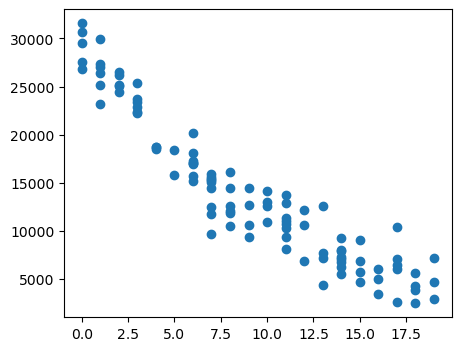

In [386]:
# Now we create the plot and add a scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(car_value["age"], car_value["resale_value"])
plt.show()

Already getting something, right?

We would like to add a few things. First, adjust the scatter plot. We would like to change the transparency of the markers using parameter `alpha`. We would also change the market size by using `s`.

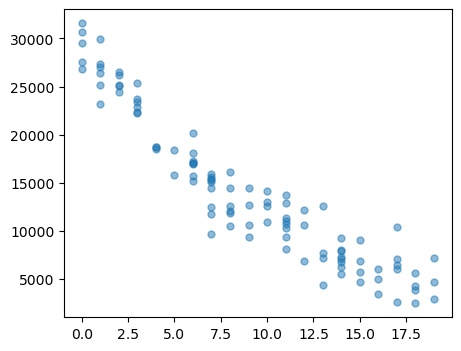

In [387]:
# Now we create the plot and add a scatter plot and adjust some parameters
plt.figure(figsize=(5, 4))
plt.scatter(car_value["age"], car_value["resale_value"], alpha=0.5, s=25)
plt.show()

What else do we need? We would like to add labels and title. We could do even more, but this plot now looks decent enough that we call it a day.

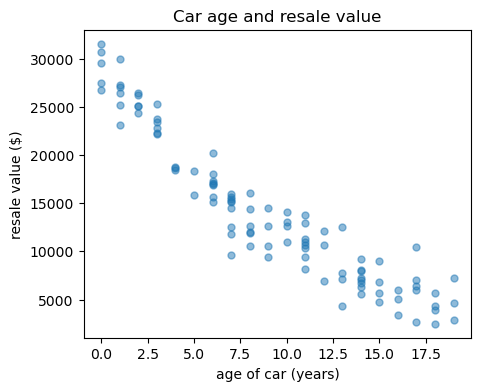

In [388]:
# Create plot area and plot, with some parameters
plt.figure(figsize=(5, 4))
plt.scatter(car_value["age"], car_value["resale_value"], alpha=0.5, s=25)

# Add labels and title
plt.xlabel("age of car (years)")
plt.ylabel("resale value ($)")
plt.title("Car age and resale value")

# Show!
plt.show()